## Classifying Defects in Magnetic Tiles
#### Erin Sawyer, Kevin Anderson. Samuel Chen, Qingqing Sun, Zixuan Huang

Image processing using neural networks can be a useful tool for manufacturers! In this project, we will be classifying magnetic tiles based on their defects, if they have one at all. 

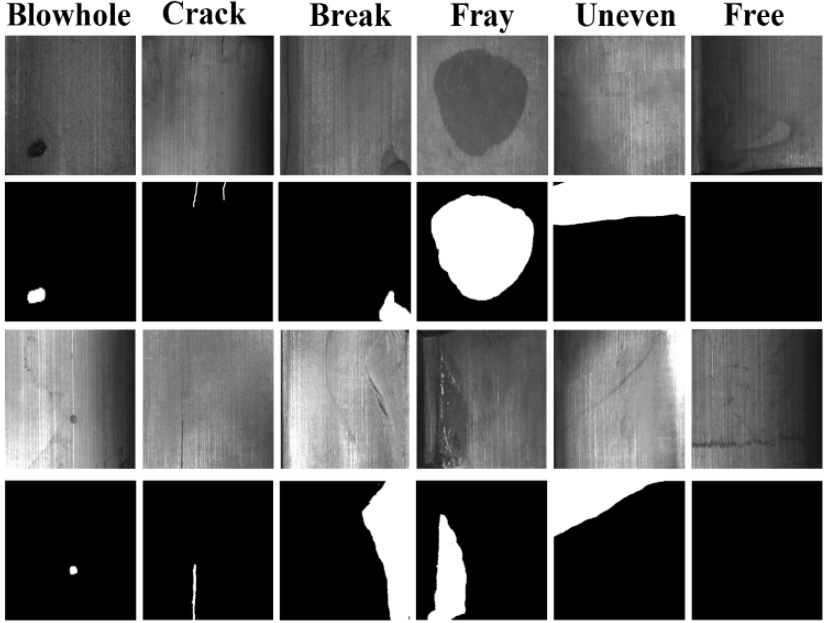

We used the binary color versions of these pictures for classification.

In [1]:
#importing all the packages we need
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as image 
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

Because we started with a dataset of just images, we had to process them, bringing them in and assigning them labels. To do this, we will follow the path to our directory of images, and iterate ethrough each folder, bringing them into our notebook.

In [2]:
#Making a list of the folders/categories to iterate through
Categories = ["Blowhole", "Break", "Crack", "Fray", "Free", "Uneven"] #file names

In [3]:
FilePath = os.path.abspath("FinalProjectProgressErin.ipynb") #Getting the path to the file
FileDirectory = os.path.dirname(FilePath)#Getting the file's directory
Directory = os.path.join(FileDirectory, 'MTImages') #navigating to the data file that will be in the same directory as the file
print(Directory) #Checking our work

C:\Users\K_e_V\CMSE_202\CMSE202\bigbrain202proj\MTImages


In [4]:
os.path.isdir(Directory) # check that path is correct

True

Here, we'll create the function to process our data, and create a usable dataset.

In [5]:
Data = [] #intializing a list for our dataset
def create_data():
    for Cat in Categories: #iterating through the different label folders
        Path = os.path.join(Directory, Cat) #adding each folder to the path
        class_num = Categories.index(Cat) #adding the label based on the folder
        for Image in os.listdir(Path): #iterating through each image in the category folder
            if Image.endswith(".png"): #avoding desktop.inis, and making sure we only get what we want
                ImageArray = plt.imread(os.path.join(Path, Image)) #bringing each image in as an array
                NewImageArray = resize(ImageArray, (200,200), anti_aliasing = True) #making sure each image is the same size
                Data.append([NewImageArray, class_num]) #adding the formatted data to our dataset
            else:
                next #helps skip desktop.inis
            

In [6]:
create_data() #creating the data

Before beginning work with the dataset, we'll want to check out its characteristics to inform our analysis, and see if it needs more cleaning. 

In [7]:
print(len(Data)) #checking the length

465


In [8]:
for i in range(10):
    print(Data[i])

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 0]
[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 0]
[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 0]
[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0.

When training a model, you don't want the model to receive all the training images of one type in a row. This can harm accuracy. Because we iterated through each category, our dataset will  be grouped by type of defect. So, we will shuffle the data.

In [21]:
np.random.shuffle(Data) #Shuffling data

Now that we have our images in the notebook, we'll get them ready to be fed through a neural network by reshaping the array, splitting out the features and labels, and using train_test_split to get our training and test set.

In [22]:
#Splitting features(image data) and labels(type of defect)
Features = []
Labels = []
for features, labels in Data:
    Features.append(features)
    Labels.append(labels)

#Reformatting our feature and label arrays
Features = np.array(Features).reshape(-1,200, 200)


In [23]:
#Getting train and test sets
FeatTrain, FeatTest, ClassTrain, ClassTest = train_test_split(Features, Labels, test_size = 0.25)

In [24]:
#Making sure our format is correct
FeatTrain = np.array(FeatTrain)
FeatTest = np.array(FeatTest)
ClassTrain = np.array(ClassTrain)
ClassTest = np.array(ClassTest)

In [25]:
#Normalizing data
FeatTrain = FeatTrain/255
FeatTest = FeatTest/255

In [26]:
#Making our labels categorical
ClassTrain = to_categorical(ClassTrain)
ClassTest = to_categorical(ClassTest)

In [28]:
network = Sequential()
network.add(Flatten())

network.add(Dense(128, input_dim=200*200, activation='relu'))
network.add(Dense(128, activation='relu'))
network.add(Dense(128, activation='relu'))

network.add(Dense(6, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [29]:
history=network.fit(FeatTrain, ClassTrain, epochs=18,  validation_split=0.1)

Epoch 1/18
10/10 [==============================] - 1s 77ms/step - loss: 1.6163 - accuracy: 0.2843 - val_loss: 1.5759 - val_accuracy: 0.4000
Epoch 2/18
10/10 [==============================] - 1s 65ms/step - loss: 1.3535 - accuracy: 0.5048 - val_loss: 1.5244 - val_accuracy: 0.4571
Epoch 3/18
10/10 [==============================] - 1s 65ms/step - loss: 1.2251 - accuracy: 0.5687 - val_loss: 1.4395 - val_accuracy: 0.5143
Epoch 4/18
10/10 [==============================] - 1s 64ms/step - loss: 1.1109 - accuracy: 0.6102 - val_loss: 1.3508 - val_accuracy: 0.5143
Epoch 5/18
10/10 [==============================] - 1s 63ms/step - loss: 1.0174 - accuracy: 0.6166 - val_loss: 1.2754 - val_accuracy: 0.5143
Epoch 6/18
10/10 [==============================] - 1s 65ms/step - loss: 0.9392 - accuracy: 0.6198 - val_loss: 1.2078 - val_accuracy: 0.5143
Epoch 7/18
10/10 [==============================] - 1s 66ms/step - loss: 0.8754 - accuracy: 0.6550 - val_loss: 1.1844 - val_accuracy: 0.5429
Epoch 8/18
10

In [30]:
test_loss, test_acc = network.evaluate(FeatTest, ClassTest)
print('test_acc:', test_acc)

4/4 [==============================] - 0s 5ms/step - loss: 0.4561 - accuracy: 0.8974
test_acc: 0.8974359035491943


In [31]:
values = ["Blowhole", "Break", "Crack", "Fray", "Free", "Uneven"]
keys = [0,1,2,3,4,5]
dic = dict(zip(keys, values)) 

In [32]:
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        
        p_title = dic[np.argmax(pred_titles[i])]
        plt.title('Pred='+p_title , size=9) #str(pred_titles[i])
        
        actual_title = dic[np.argmax(true_titles[i])]
        plt.xlabel('Actual='+ actual_title, size=9)#str(true_titles[i])
        
        plt.xticks(())
        plt.yticks(())

pred_labels = network.predict(FeatTest)

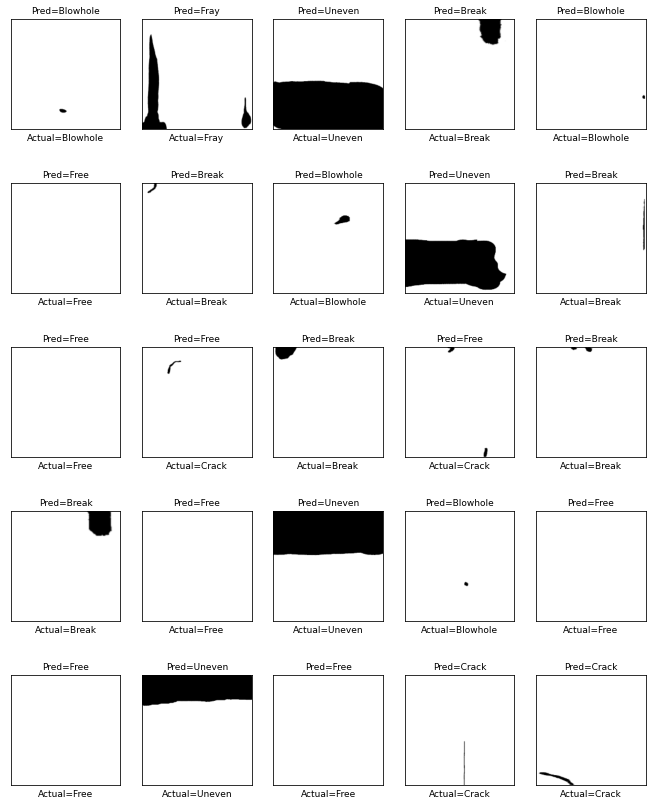

In [33]:
plot_gallery(FeatTest, ClassTest, pred_labels, 200,200)

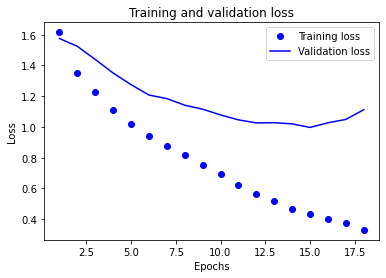

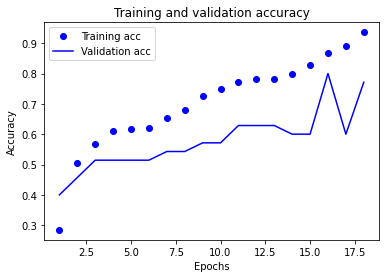

In [34]:
plt.clf()   # clear figure

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Kim, A. (n.d.). Magnetic Tile Surface Defects. Retrieved from https://www.kaggle.com/alex000kim/magnetic-tile-surface-defects/version/1.

Sentdex. (2018, August 18). Loading in your own data - Deep Learning basics with Python, TensorFlow and Keras p.2. Retrieved December 07, 2020, from https://youtu.be/j-3vuBynnOE

Sentdex. (2018, August 19). Convolutional Neural Networks - Deep Learning basics with Python, TensorFlow and Keras p.3. Retrieved December 07, 2020, from https://youtu.be/WvoLTXIjBYU

